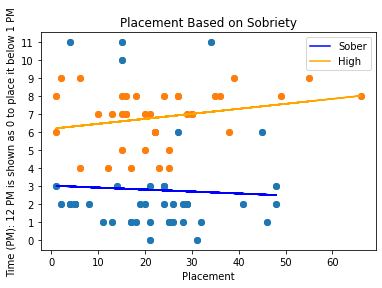

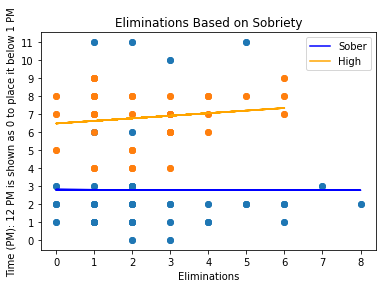

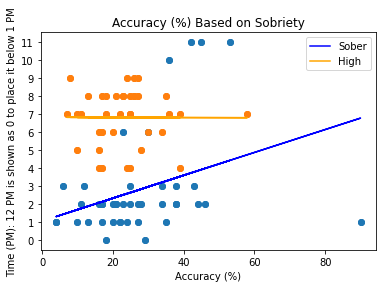

In [19]:
# Cora Wagner, Coleman Doherty, Nathaniel Champion
# Intro to Data Science Final

# https://pythonguides.com/python-plot-multiple-lines/
# https://www.askpython.com/python/string/remove-character-from-string-python#:~:text=5%20Ways%20to%20Remove%20a%20Character%20from%20String,list%20comprehension%205%20By%20using%20translate%20%28%29%20method
# https://pythonguides.com/matplotlib-save-as-png/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in a .csv file containing Fortnite statistics
file = pd.read_csv('FortniteStatistics.csv')

# Clean the data by creating a data frame that contains the specific data we want
#       (Time, Sobriety, Placement, Eliminations, and Accuracy)
data = {'Time': file['Time of Day'].tolist(), 'Sobriety': file['Mental State'].tolist(), 'Placement': file['Placed'].tolist(),
        'Eliminations': file['Eliminations'].tolist(), 'Accuracy': file['Accuracy'].tolist()}
df = pd.DataFrame(data, columns=['Time', 'Sobriety', 'Placement', 'Eliminations', 'Accuracy'])

# Separates the data based on Sobriety in order to create 2 lines (sober and high) for each
#       linear regression graph
soberDF = df.loc[df.Sobriety == "sober"]
highDF = df.loc[df.Sobriety == "high"]

# Variables for graph labels
p = "Placement"
e = "Eliminations"
a = "Accuracy (%)"

# Lists from data frame data in order to use when creating graphs
sTime = soberDF['Time'].tolist()
hTime = highDF['Time'].tolist()
sSob = soberDF['Sobriety'].tolist()
hSob = highDF['Sobriety'].tolist()
sPlace = soberDF['Placement'].tolist()
hPlace = highDF['Placement'].tolist()
sElm = soberDF['Eliminations'].tolist()
hElm = highDF['Eliminations'].tolist()
sAcc = soberDF['Accuracy'].tolist()
hAcc = highDF['Accuracy'].tolist()

# Removes the characters after the : and converts the string to an int
#       i.e. 10:00 PM becomes 10
# It also converts 12 to 0 so that the data for 12 pm comes before the data
#       for 1 pm
intTimeSob = []
for i in sTime:
    s = i.split(":", 1)
    r = int(s[0])
    if r == 12:
        r = 0
    intTimeSob.append(r)

intTimeHig = []
for i in hTime:
    s = i.split(":", 1)
    r = int(s[0])
    if r == 12:
        r = 0
    intTimeHig.append(r)

# Removes % sign from the Accuracy data and converts the string to an int
#       i.e. 30% becomes 30
intAccSob = []
for j in sAcc:
    u = j.split("%",1)
    v = int(u[0])
    intAccSob.append(v)

intAccHig = []
for j in hAcc:
    u = j.split("%",1)
    v = int(u[0])
    intAccHig.append(v)

# Function that creates the graphs for each set of data given as parameters
def graph(x_sober, x_high, y_sober, y_high, x_name):
    # Plot data points
    plt.scatter(x_sober, y_sober) # sober: red
    plt.scatter(x_high, y_high) # high: blue

    # Plot line of best fit
    x = np.array(x_sober)
    y = np.array(y_sober)
    m, b = np.polyfit(x, y, 1)

    plt.plot(x, y, 'o')
    plt.plot(x, m*x + b, 'blue', label = "Sober")

    x2 = np.array(x_high)
    y2 = np.array(y_high)
    n, c = np.polyfit(x2, y2, 1)

    plt.plot(x2, y2, 'o')
    plt.plot(x2, n*x2 + c, 'orange', label = "High")

    # Add title and axis labels
    plt.title(x_name + " Based on Sobriety")
    plt.xlabel(x_name)
    plt.ylabel("Time (PM): 12 PM is shown as 0 to place it below 1 PM")
    plt.yticks(np.arange(0,12,1))

    plt.legend()
    plt.savefig("" + x_name + ".png")
    plt.show()

# Function calls for the function creating the individual graphs
#   graph(x_sober, x_high, y_sober, y_high, x_name)
graph(sPlace, hPlace, intTimeSob, intTimeHig, p)
graph(sElm, hElm, intTimeSob, intTimeHig, e)
graph(intAccSob, intAccHig, intTimeSob, intTimeHig, a)